<a href="https://colab.research.google.com/github/X4D0/DataVisualization/blob/main/Assignment2_1301184233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading and Prepping Data <a id="2"></a>
### Rayhan Rahmanda - 1301184233
### IF-41-GAB03

Import primary modules.

In [49]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the dataset and read it into a *pandas* dataframe.

In [50]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [51]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

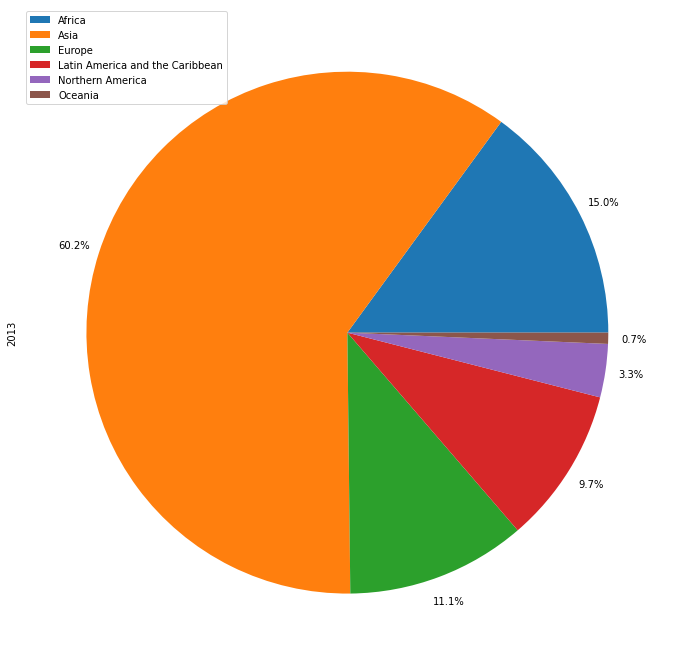

In [52]:
### type your answer here
# Membuat Group berdasarkan "Continent" menggunakan groupby()
df_con = df_can.groupby('Continent', axis=0).sum()
# Membuat Piechart
plot_con = df_con['2013'].plot(kind="pie", autopct='%1.1f%%', labels=None, pctdistance=1.1, figsize=(15,12))
plot_con.legend(labels=df_con.index, loc='upper left')


**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [53]:
### type your answer here
df_PA = df_can.loc[['Pakistan','Afghanistan'], years].transpose()
df_PA



Country,Pakistan,Afghanistan
1980,978,16
1981,972,39
1982,1201,39
1983,900,47
1984,668,71
1985,514,340
1986,691,496
1987,1072,741
1988,1334,828
1989,2261,1076


Step 2: Plot data.

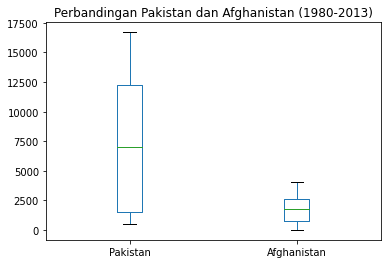

In [54]:
### type your answer here
df_PA.plot(kind='box', title="Perbandingan Pakistan dan Afghanistan (1980-2013)")




**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [55]:
### type your answer here
df_countries = df_can.loc[['Denmark','Norway','Sweden'], years] # Mengambil data tiap tahun dari Negara Denmark, Norway, Sweden
df_total = pd.DataFrame(df_countries[years].sum(axis=0)) # Menjumlahkan angka imigrasi tiap tahun
df_total.reset_index(inplace=True) # Mengembalikan Index ke dalam kolom yang ada di df_tot, apabila tidak maka dataframe tidak akan memiliki nama kolom
df_total.columns = ['Years','Total'] # Rename kolom menjadi Year dan Total
df_total # Menampilkan Dataframe

,Years,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

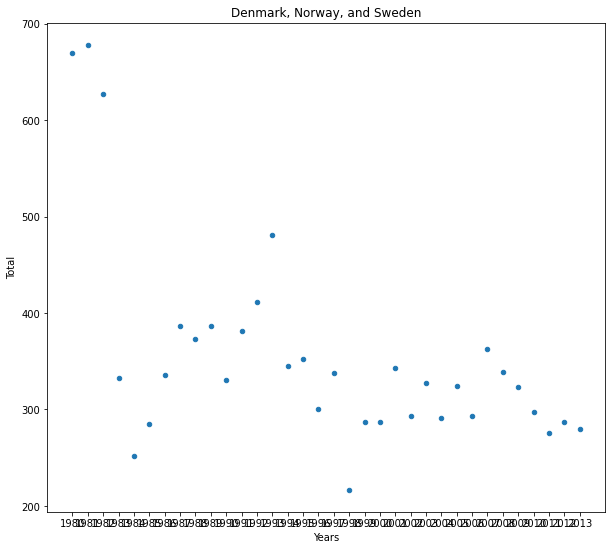

In [56]:
### type your answer here
df_total_plot = df_total.plot(kind='scatter', x='Years', y='Total', figsize=(10,9), title="Denmark, Norway, and Sweden")
df_total_plot

**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [59]:
### type your answer here
df_can_t = df_can[years].transpose() # Dataframe yang sudah di transpose
df_can_t.index = map(int, df_can_t.index) # Mengubah index menjadi type int
df_can_t.index.name = 'Year' # Menamakan index dengan 'Year'
df_can_t.reset_index(inplace=True)
# Rumus Normalisasi X' = X - Xmin/Xmax-Xmin
# Normalisasi China
china = (df_can_t['China']-df_can_t['China'].min())/(df_can_t['China'].max()-df_can_t['China'].min())
# Normalisasi India
india = (df_can_t['India']-df_can_t['India'].min())/(df_can_t['India'].max()-df_can_t['India'].min())

Step 2: Generate the bubble plots.

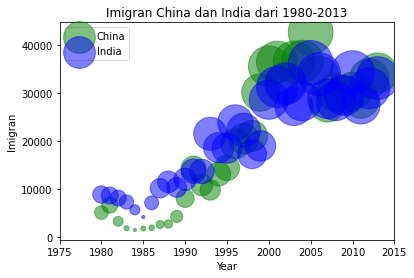

In [61]:
### type your answer here
# China
ax0 = df_can_t.plot(kind='scatter',x='Year',y='China',alpha=0.5,color='green',s=china*2000+10,xlim=(1975,2015))
# india
ax1 = df_can_t.plot(kind='scatter',x='Year',y='India',alpha=0.5,color='blue',s=india*2000+10,ax=ax0)
ax0.set_ylabel("Imigran")
ax0.set_title("Imigran China dan India dari 1980-2013")
ax0.legend(['China','India'],loc='upper left')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).